# Visualization of Ben Recht dataset using t-SNE

In [1]:
import pandas as pd
import numpy as np
import torch
import time

from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

## Loading dataset

In [3]:
import sys
from os import path
sys.path.append(path.abspath('../CIFAR_modified/code'))
print(os.getcwd())
os.chdir('..')
import CIFAR_modified
from CIFAR_modified.code import utils

version = 'v4'
images, labels = utils.load_new_test_data(version)
images = images.transpose(0, 3, 1, 2)
num_images = images.shape[0]
images = images.astype(np.float32)/255.0
labels = labels.astype(np.int64)
print('\nLoaded version "{}" of the CIFAR-10.1 dataset.'.format(version))
print('There are {} images in the dataset.'.format(num_images))
print(images.dtype)

/home/rsharma/dev/semisup-adv/dataset_utils
Loading labels from file /home/rsharma/dev/semisup-adv/CIFAR_modified/datasets/cifar10.1_v4_labels.npy
Loading image data from file /home/rsharma/dev/semisup-adv/CIFAR_modified/datasets/cifar10.1_v4_data.npy

Loaded version "v4" of the CIFAR-10.1 dataset.
There are 2021 images in the dataset.
float32


In [4]:
images.shape
images = images.flatten().reshape(2021, -1)
images.shape

(2021, 3072)

In [5]:
labels.shape
labels
feat_cols = [ 'pixel'+str(i) for i in range(images.shape[1]) ]

# feat_cols

In [6]:
df = pd.DataFrame(images, columns=feat_cols)
df['y'] = labels
df['label'] = df['y'].apply(lambda i: str(i))
print(f'Df shape: {df.shape}')

Df shape: (2021, 3074)


In [7]:
# For reproducability of the results
np.random.seed(42)
rndperm = np.random.permutation(df.shape[0])

In [8]:
data = df[feat_cols].values

In [9]:
time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(data)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 2021 samples in 0.457s...
[t-SNE] Computed neighbors for 2021 samples in 25.404s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2021
[t-SNE] Computed conditional probabilities for sample 2000 / 2021
[t-SNE] Computed conditional probabilities for sample 2021 / 2021
[t-SNE] Mean sigma: 3.434846
[t-SNE] KL divergence after 250 iterations with early exaggeration: 85.610703
[t-SNE] KL divergence after 300 iterations: 2.178565
t-SNE done! Time elapsed: 27.782467126846313 seconds


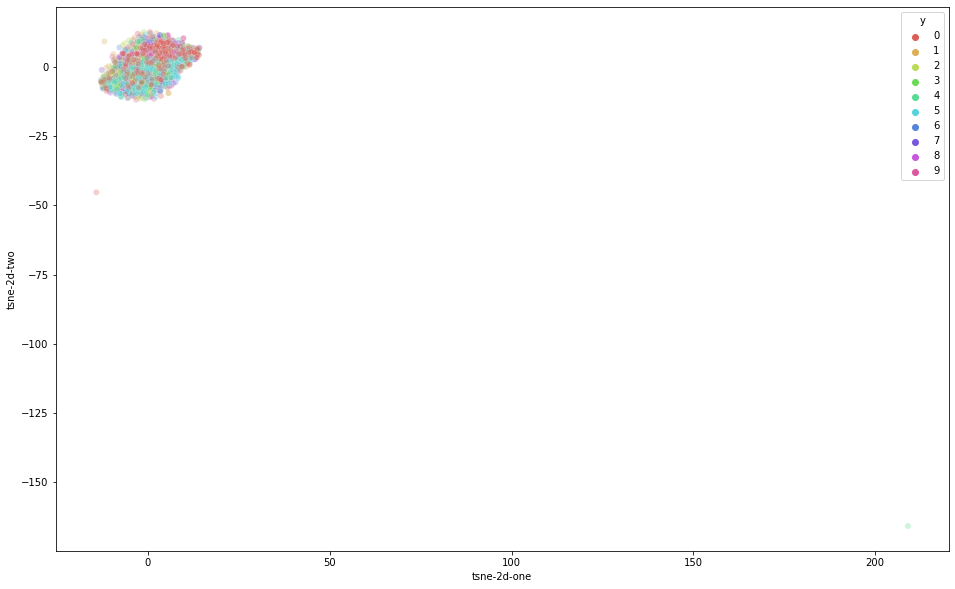

In [10]:
df['tsne-2d-one'] = tsne_results[:,0]
df['tsne-2d-two'] = tsne_results[:,1]
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="y",
    palette=sns.color_palette("hls", 10),
    data=df,
    legend="full",
    alpha=0.3
)

## Loading Tiny Images dataset

In [11]:
print(os.getcwd())
with open('data/unlabeled_datasets/80M_Tiny_Images/tiny_50k.bin', "rb") as ti_file:
    ti_images = []
    for idx in range(50000):
        ti_file.seek(idx * 3072)
        data = ti_file.read(3072)
        ti_images.append(np.fromstring(data, dtype='uint8').reshape(32, 32, 3, order='F'))

    # ti_images = np.asarray(data)

print(np.shape(ti_images))

/home/rsharma/dev/semisup-adv
(50000, 32, 32, 3)


In [12]:
import pickle

with open('data/ti_500K_pseudo_labeled.pickle', 'rb') as ti_500k_file:
    aux = pickle.load(ti_500k_file)
aux_data = aux['data']
aux_targets = aux['extrapolated_targets']

print(aux_data.shape, aux_targets.shape)

(500000, 32, 32, 3) (500000,)


In [13]:
aux_data = aux_data.flatten().reshape(500000, -1)
aux_feat_cols = [ 'pixel'+str(i) for i in range(aux_data.shape[1]) ]

In [14]:
aux_df = pd.DataFrame(aux_data, columns=feat_cols)
aux_df['y'] = aux_targets
aux_df['label'] = aux_df['y'].apply(lambda i: str(i))
print(f'Aux df shape: {aux_df.shape}')

Aux df shape: (500000, 3074)


In [15]:
# For reproducability of the results
np.random.seed(42)
rndperm = np.random.permutation(aux_df.shape[0])

In [16]:
N = 10000
df_subset = aux_df.loc[rndperm[:N], :].copy()
data_subset = df_subset[aux_feat_cols].values

In [17]:
time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(data_subset)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 10000 samples in 4.122s...
[t-SNE] Computed neighbors for 10000 samples in 578.410s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 451.465513
[t-SNE] KL divergence after 250 iterations with early exaggeration: 89.237053
[t-SNE] KL divergence after 300 iterations: 3.587989
t-SNE done! Time elap

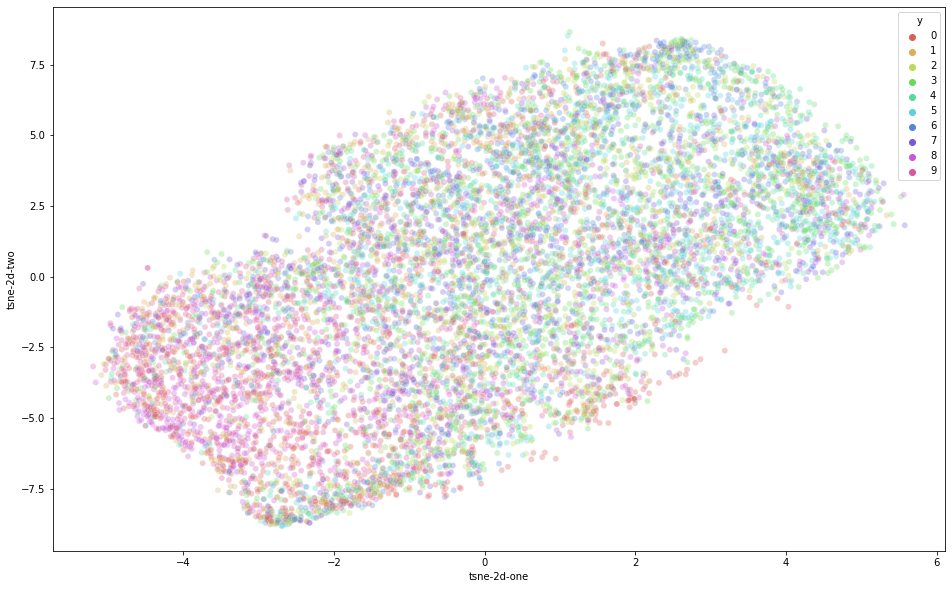

In [18]:
df_subset['tsne-2d-one'] = tsne_results[:,0]
df_subset['tsne-2d-two'] = tsne_results[:,1]
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="y",
    palette=sns.color_palette("hls", 10),
    data=df_subset,
    legend="full",
    alpha=0.3
)

# Plotting t-SNE for Ben Recht, CIFAR-10 train and TI images for a class

In [19]:
class_to_vis=0

## Load TI df for class_to_vis

In [21]:
import pickle

# TI data
with open('data/ti_500K_pseudo_labeled.pickle', 'rb') as ti_500k_file:
    aux = pickle.load(ti_500k_file)
aux_data = aux['data']
aux_targets = aux['extrapolated_targets']



In [22]:
aux_data = aux_data.flatten().reshape(500000, -1)
aux_feat_cols = [ 'pixel'+str(i) for i in range(aux_data.shape[1]) ]

import pandas as pd
aux_df = pd.DataFrame(aux_data, columns=aux_feat_cols)
aux_df['y'] = aux_targets
aux_df['label'] = aux_df['y'].apply(lambda i: str(i))
aux_df['dataset'] = 'ti'

In [23]:
print(aux_df[:2])

   pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0      68      69      65      59      60      58      66      67      63   
1     102     128     100     101     127      99     103     129     101   

   pixel9  ...  pixel3065  pixel3066  pixel3067  pixel3068  pixel3069  \
0      73  ...        109        102        104        108        102   
1     103  ...         64         91        118         86         95   

   pixel3070  pixel3071  y  label  dataset  
0        103        107  1      1       ti  
1        126         90  0      0       ti  

[2 rows x 3075 columns]


In [24]:
ti_df = aux_df[aux_df['y'] == class_to_vis]

print(ti_df.shape)

(50443, 3075)


## Load CIFAR-10 df for class_to_vis

In [25]:
# from torchvision.datasets import CIFAR10

# cifar_trainset = datasets.CIFAR10(root='./data', train=True, download=True, transform=None)

def load_cifar10_data(filename):
    with open('data/cifar-10-batches-py/'+ filename, 'rb') as file:
        batch = pickle.load(file, encoding='latin1')

    features = batch['data']
    labels = batch['labels']
    return features, labels

batch_1, labels_1 = load_cifar10_data('data_batch_1')
batch_2, labels_2 = load_cifar10_data('data_batch_2')
batch_3, labels_3 = load_cifar10_data('data_batch_3')
batch_4, labels_4 = load_cifar10_data('data_batch_4')
batch_5, labels_5 = load_cifar10_data('data_batch_5')

# Merge files
X_train = np.concatenate([batch_1,batch_2,batch_3,batch_4,batch_5], 0)
Y_train = np.concatenate([labels_1,labels_2,labels_3,labels_4,labels_5], 0)

print(f'x_train shape: {X_train.shape}, y_train shape: {Y_train.shape}')

x_train shape: (50000, 3072), y_train shape: (50000,)


In [26]:
ci_feat_cols = [ 'pixel'+str(i) for i in range(X_train.shape[1]) ]

ci_df = pd.DataFrame(X_train, columns=ci_feat_cols)
ci_df['y'] = Y_train
ci_df['label'] = ci_df['y'].apply(lambda i: str(i))
ci_df['dataset'] = 'ci'
print(f'Df shape: {ci_df.shape}')
ci_df = ci_df.reindex()

Df shape: (50000, 3075)


In [27]:
ci_df = ci_df[ci_df['y'] == class_to_vis]
print(ci_df.shape)

(5000, 3075)


## Load Ben Recht df for class_to_vis

In [28]:
import sys
from os import path
sys.path.append(path.abspath('../CIFAR_modified/code'))
import CIFAR_modified
from CIFAR_modified.code import utils

version = 'v4'
images, labels = utils.load_new_test_data(version)
images = images.transpose(0, 3, 1, 2)
num_images = images.shape[0]
images = images.astype(np.float32)/255.0
labels = labels.astype(np.int64)
print('\nLoaded version "{}" of the CIFAR-10.1 dataset.'.format(version))
print('There are {} images in the dataset.'.format(num_images))
print(images.dtype)

images.shape
images = images.flatten().reshape(2021, -1)
images.shape

labels.shape
labels
feat_cols = [ 'pixel'+str(i) for i in range(images.shape[1]) ]

df = pd.DataFrame(images, columns=feat_cols)
df['y'] = labels
df['label'] = df['y'].apply(lambda i: str(i))
df['dataset'] = 'br'
print(f'Df shape: {df.shape}')

Loading labels from file /home/rsharma/dev/semisup-adv/CIFAR_modified/datasets/cifar10.1_v4_labels.npy
Loading image data from file /home/rsharma/dev/semisup-adv/CIFAR_modified/datasets/cifar10.1_v4_data.npy

Loaded version "v4" of the CIFAR-10.1 dataset.
There are 2021 images in the dataset.
float32
Df shape: (2021, 3075)


In [29]:
br_df = df[df['y'] == class_to_vis]

print(br_df.shape)

(208, 3075)


## Start t-SNE for the datasets


### T-SNE data pre-processing

In [30]:
print('CI:', X_train.shape, Y_train.shape, type(X_train), type(Y_train))
print('TI:', aux_data.shape, aux_targets.shape, type(aux_data), type(aux_targets))

CI: (50000, 3072) (50000,) <class 'numpy.ndarray'> <class 'numpy.ndarray'>
TI: (500000, 3072) (500000,) <class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [31]:
np.random.seed(42)
rndperm = np.random.permutation(aux_df.shape[0])

N = 10000
df_subset = aux_df.loc[rndperm[:N], :].copy()

N = 200

# For reproducability of the results
np.random.seed(42)

ci_rndperm = np.random.permutation(ci_df.shape[0])
ci_subset = ci_df.loc[ci_rndperm[:N], :].copy()

KeyError: 'Passing list-likes to .loc or [] with any missing labels is no longer supported, see https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike'

In [41]:
# How many examples of each dataset to select for visualizing
N = 200

# For reproducability of the results
np.random.seed(42)

br_rndperm = np.random.permutation(br_df.shape[0])
brdf_subset = br_df.iloc[br_rndperm[:N], :].copy()
br_subset = brdf_subset[feat_cols].values

ci_rndperm = np.random.permutation(ci_df.shape[0])
cidf_subset = ci_df.iloc[ci_rndperm[:N], :].copy()
ci_subset = cidf_subset[ci_feat_cols].values

ti_rndperm = np.random.permutation(ti_df.shape[0])
tidf_subset = ti_df.iloc[ti_rndperm[:N], :].copy()
ti_subset = tidf_subset[aux_feat_cols].values

In [39]:
# tsne_df = ci_subset.append(ti_subset, ignore_index=True).append(br_subset, ignore_index=True)
tsne_data = np.append(ci_subset, ti_subset, axis=0)
tsne_data = np.append(tsne_data, br_subset, axis=0)
tsne_data.shape

(600, 3072)

In [ ]:
# For reproducability of the results
np.random.seed(42)
rndperm = np.random.permutation(aux_df.shape[0])

In [40]:
time_start = time.time()
tsne = TSNE(n_components=3, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(tsne_data)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 600 samples in 0.087s...
[t-SNE] Computed neighbors for 600 samples in 1.250s...
[t-SNE] Computed conditional probabilities for sample 600 / 600
[t-SNE] Mean sigma: 9.301961
[t-SNE] KL divergence after 250 iterations with early exaggeration: 111.401550
[t-SNE] KL divergence after 300 iterations: 3.623773
t-SNE done! Time elapsed: 3.1722769737243652 seconds


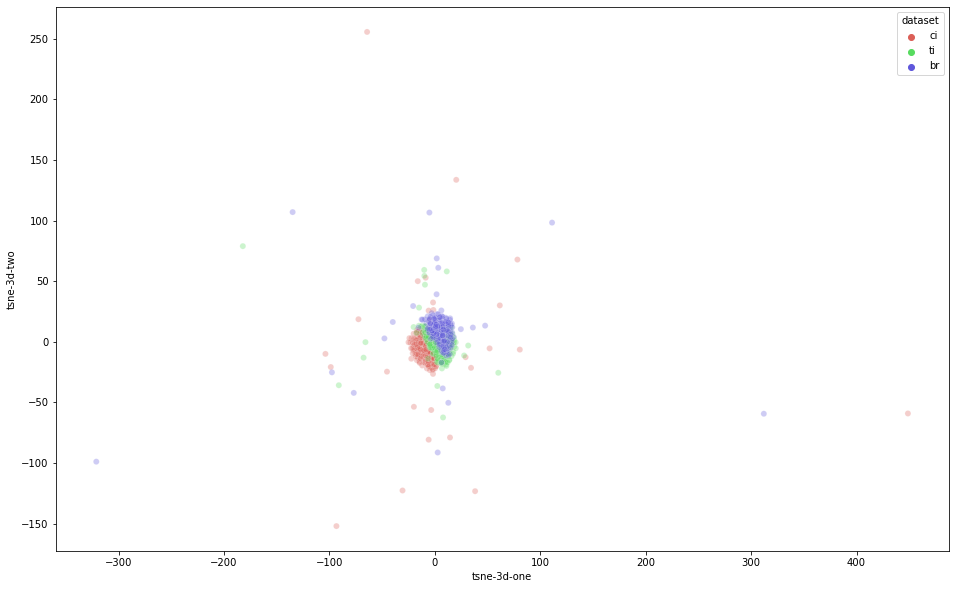

In [48]:
tsne_df = cidf_subset.append(tidf_subset, ignore_index=True).append(brdf_subset, ignore_index=True)

tsne_df['tsne-3d-one'] = tsne_results[:,0]
tsne_df['tsne-3d-two'] = tsne_results[:,1]
tsne_df['tsne-3d-three'] = tsne_results[:,2]

plt.figure(figsize=(16,10))

# 2D scatter plot
sns.scatterplot(
    x="tsne-3d-one", y="tsne-3d-two",
    hue="dataset",
    palette=sns.color_palette("hls", 3),
    data=tsne_df,
    legend="full",
    alpha=0.3
)

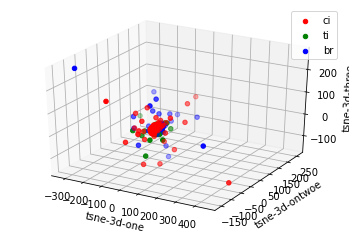

In [65]:
# 3D scatter plot

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ci_x = tsne_df[tsne_df['dataset'] == 'ci']['tsne-3d-one']
ti_x = tsne_df[tsne_df['dataset'] == 'ti']['tsne-3d-one']
br_x = tsne_df[tsne_df['dataset'] == 'br']['tsne-3d-one']

ci_y = tsne_df[tsne_df['dataset'] == 'ci']['tsne-3d-two']
ti_y = tsne_df[tsne_df['dataset'] == 'ti']['tsne-3d-two']
br_y = tsne_df[tsne_df['dataset'] == 'br']['tsne-3d-two']

ci_z = tsne_df[tsne_df['dataset'] == 'ci']['tsne-3d-three']
ti_z = tsne_df[tsne_df['dataset'] == 'ti']['tsne-3d-three']
br_z = tsne_df[tsne_df['dataset'] == 'br']['tsne-3d-three']

ax.set_xlabel('tsne-3d-one')
ax.set_ylabel('tsne-3d-ontwoe')
ax.set_zlabel('tsne-3d-three')

ax.scatter(ci_x, ci_y, ci_z, c='red', label='ci')
ax.scatter(ti_x, ti_y, ti_z, c='green', label='ti')
ax.scatter(br_x, br_y, br_z, c='blue', label='br')
ax.legend()
plt.show()